In [59]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openpyxl
import numpy as np

# print(os.getcwd())

In [60]:
!pip install openpyxl

### EDA (Exploratory Data Anaysis)

In [61]:
df = pd.read_excel('../data/flight_price.xlsx')

In [62]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [63]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [64]:
## get basic info about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [65]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


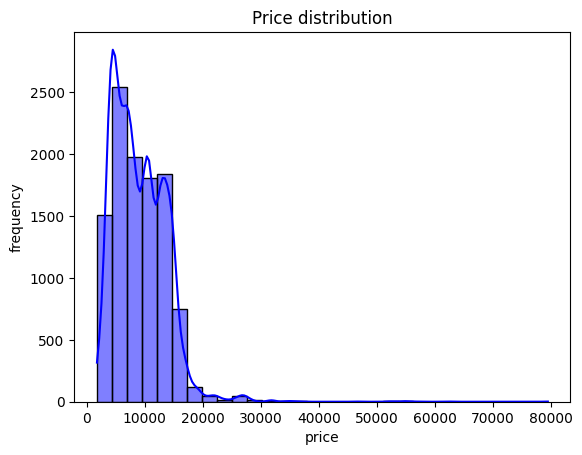

In [66]:
sns.histplot(df['Price'], bins=30, color='blue', edgecolor='black', kde=True)
plt.title('Price distribution')
plt.xlabel("price")
plt.ylabel("frequency")
plt.show()

<Axes: xlabel='Price'>

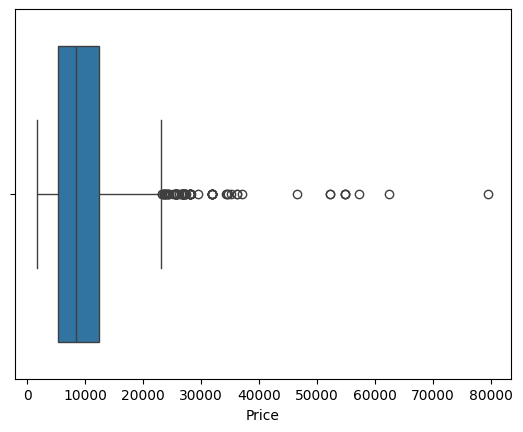

In [67]:
sns.boxplot(x=df['Price'])

In [68]:
from scipy import stats


In [69]:
df['Z_score'] = stats.zscore(df['Price'])

In [70]:
df['Z_score']

0       -1.125548
1       -0.309048
2        1.039858
3       -0.622202
4        0.914076
           ...   
10678   -1.080006
10679   -1.071765
10680   -0.402951
10681    0.772246
10682    0.578151
Name: Z_score, Length: 10683, dtype: float64

In [71]:
df_outiers = df[(df['Z_score'] > 3) | (df['Z_score'] < -3)]
df_outiers

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Z_score
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430,3.977958
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983,6.049679
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890,3.860851
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890,3.860851
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139,3.481118
...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210,3.279650
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,10.436010
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890,3.860851
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825,4.931084


In [72]:
minimun, Q1, median, Q3, maximum = np.quantile(df['Price'], [0, 0.25, 0.50, 0.75, 1.0])


In [73]:
median

8372.0

In [74]:
IQR = Q3 - Q1
print(IQR)

7096.0


In [75]:
lower_fence = Q1 - 1.5 * (IQR)
heigher_fence = Q3 + 1.5 * (IQR)

In [76]:
lower_fence

-5367.0

In [77]:
heigher_fence

23017.0

<Axes: xlabel='Price'>

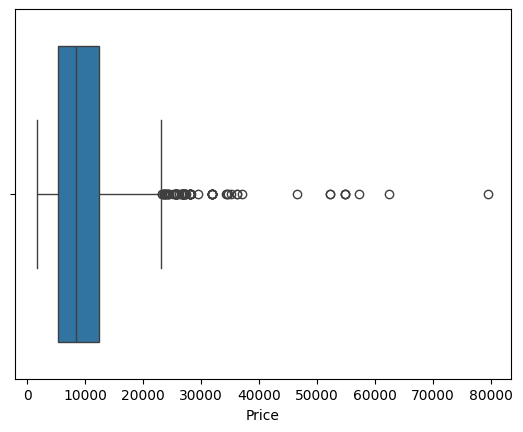

In [78]:
sns.boxplot(x=df['Price'])

In [79]:
new_df = df[df['Price'] <= 20000]

<Axes: xlabel='Price', ylabel='Count'>

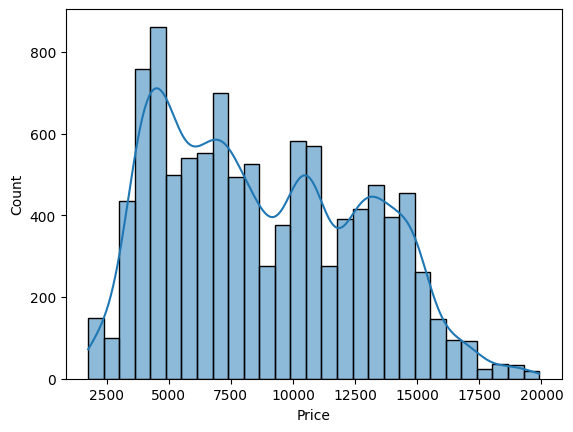

In [80]:
sns.histplot(new_df['Price'], kde=True)

## Feature engineering

In [81]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]

In [82]:
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [83]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Z_score,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,-1.125548,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,-0.309048,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1.039858,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,-0.622202,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0.914076,01,03,2019


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  int64  
 11  Z_score          10683 non-null  float64
 12  Date             10683 non-null  object 
 13  Month            10683 non-null  object 
 14  Year             10683 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.2+ MB


In [85]:
## convert obejct type into int
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  int64  
 11  Z_score          10683 non-null  float64
 12  Date             10683 non-null  int64  
 13  Month            10683 non-null  int64  
 14  Year             10683 non-null  int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 1.2+ MB


In [87]:
# Drop year of journy columns 
df.drop('Date_of_Journey', axis=1, inplace=True)

In [88]:
lst_col = df.columns

In [89]:
lst_col

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Z_score',
       'Date', 'Month', 'Year'],
      dtype='object')

In [90]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Z_score,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,-1.125548,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,-0.309048,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1.039858,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,-0.622202,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0.914076,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,-1.130753,24,6,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,0.433718,12,3,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,2.858930,1,3,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,0.433718,12,3,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,-0.100206,27,5,2019


In [91]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [92]:
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arival_min'] = df['Arrival_Time'].str.split(':').str[1]

In [93]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Z_score,Date,Month,Year,Arrival_hour,Arival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,-1.125548,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,-0.309048,1,5,2019,13,15


In [94]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arival_min'] = df['Arival_min'].astype(int)

In [95]:
df.drop('Arrival_Time', axis=1, inplace=True)

In [96]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Z_score,Date,Month,Year,Arrival_hour,Arival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,-1.125548,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,-0.309048,1,5,2019,13,15


In [97]:
df['Dep_hour'] = df['Dep_Time'].apply(lambda x:x.split(':')[0])
df['Dep_min'] = df['Dep_Time'].apply(lambda x:x.split(':')[1])

In [98]:
df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_min'] = df['Dep_min'].astype(int)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Dep_Time         10683 non-null  object 
 5   Duration         10683 non-null  object 
 6   Total_Stops      10682 non-null  object 
 7   Additional_Info  10683 non-null  object 
 8   Price            10683 non-null  int64  
 9   Z_score          10683 non-null  float64
 10  Date             10683 non-null  int64  
 11  Month            10683 non-null  int64  
 12  Year             10683 non-null  int64  
 13  Arrival_hour     10683 non-null  int64  
 14  Arival_min       10683 non-null  int64  
 15  Dep_hour         10683 non-null  int64  
 16  Dep_min          10683 non-null  int64  
dtypes: float64(1

In [100]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Z_score,Date,Month,Year,Arrival_hour,Arival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,-1.125548,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,-0.309048,1,5,2019,13,15,5,50


In [101]:
df.drop('Dep_Time', axis=1, inplace=True)

In [102]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [110]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '3 stops': 3, '4 stops': 4, '2 stops': 2, np.nan:1})

In [105]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Z_score,Date,Month,Year,Arrival_hour,Arival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,-1.125548,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,-0.309048,1,5,2019,13,15,5,50


In [106]:
df.drop('Route', axis=1, inplace=True)

In [179]:
df['Dur_hour'] = df['Duration'].str.replace('h', '').str.replace('m', '').str[0]
# df['Dur_min'] = df['Duration'].str.replace('h', '').str.replace('m', '').str[0]

In [144]:
df['Duration'] = df['Duration'].str.replace('h', '').str.replace('m', '')

In [178]:
val = df['Duration']
for key in val:
    print(key[0])

2
7
1
5
4
2
1
2
2
7
1
2
2
1
2
2
4
2
2
2
5
1
2
2
1
1
5
5
2
2
2
1
2
2
5
1
5
2
6
1
1
8
2
2
1
2
2
2
1
1
3
2
2
3
2
1
1
2
6
2
1
2
1
1
2
1
2
1
1
2
1
2
7
1
5
2
2
1
1
2
1
2
2
9
1
2
5
1
1
1
9
1
1
1
2
2
2
3
1
1
1
1
7
2
2
8
7
1
3
1
1
2
1
1
5
1
1
1
2
1
2
1
1
2
2
2
1
1
2
2
8
1
3
2
1
2
2
2
2
1
8
8
5
8
1
2
8
2
4
8
2
2
2
1
1
2
1
2
2
2
2
2
2
9
4
1
1
2
9
2
2
3
1
9
1
1
5
2
2
1
1
1
9
1
2
4
5
2
2
2
4
2
6
3
1
2
1
1
2
8
9
2
3
2
1
2
9
2
9
2
2
5
9
1
4
1
1
2
2
1
2
1
1
9
2
2
3
2
1
1
2
2
6
1
5
2
2
1
2
1
8
5
1
2
2
2
9
1
2
4
3
2
2
1
2
1
2
3
1
1
2
2
2
1
1
1
1
1
2
1
1
9
1
7
2
1
1
5
1
3
2
2
2
1
2
8
3
2
7
2
8
2
2
1
2
3
1
2
1
2
1
2
2
2
1
1
7
2
2
2
2
2
5
1
2
2
2
6
2
2
2
5
2
1
1
2
5
1
2
5
4
8
2
2
2
1
2
7
2
7
3
7
2
1
3
2
9
1
2
3
2
4
2
2
1
2
4
1
3
2
3
2
2
2
1
2
1
2
3
2
3
1
2
2
1
1
8
2
2
1
1
1
3
1
1
2
2
1
2
2
2
5
1
8
5
2
6
2
2
1
1
2
2
2
2
8
2
2
6
1
2
1
2
5
2
2
1
1
8
2
9
7
1
2
2
1
2
7
2
2
2
1
1
2
2
2
9
3
6
8
2
1
5
4
9
2
2
2
9
2
1
8
1
2
7
2
5
2
5
1
1
3
4
2
2
9
2
6
5
2
3
1
9
6
2
5
2
2
3
5
1
7
8
9
2
2
6
4
2
1
1
1
2
1
5
1
7
9
2
1


In [185]:
df['Dur_hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10683 entries, 0 to 10682
Series name: Dur_hour
Non-Null Count  Dtype 
--------------  ----- 
10683 non-null  object
dtypes: object(1)
memory usage: 83.6+ KB
